# 🧠 Introduction to SPARQL (SPARQL Protocol and RDF Query Language)

SPARQL is the standard query language for querying RDF-based Knowledge Graphs.
It allows you to retrieve and manipulate data stored as triples `(subject, predicate, object)`.

In this notebook, you’ll learn:
- Basic RDF triple concepts
- How to write SPARQL queries
- How to use `rdflib` to query RDF data locally
- How to query a public endpoint (DBpedia)


## 🧩 RDF Basics — Resource Description Framework

RDF represents knowledge as **triples**:

> (subject, predicate, object)

Example:
- (Alice, knows, Bob)
- (Bob, type, Person)

Each entity (subject/object) is a **node**, and each predicate is a **relationship** (edge).
This makes RDF data naturally **graph-shaped**.

We use `rdflib` to represent and query RDF graphs in Python.


In [3]:
!pip install rdflib networkx pyvis SPARQLWrapper


In [2]:

from rdflib import Graph, Literal, RDF, URIRef, Namespace
from SPARQLWrapper import SPARQLWrapper, JSON

import networkx as nx
from pyvis.network import Network



## 🧱 Creating a Simple RDF Graph

We'll build a small Knowledge Graph with 3 people — Alice, Bob, and Charlie — and their relationships.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, Literal, RDF, Namespace

# Build RDF graph
g = Graph()
ex = Namespace("http://example.org/")
g.add((ex.Alice, RDF.type, ex.Person))
g.add((ex.Alice, ex.name, Literal("Alice")))
g.add((ex.Alice, ex.knows, ex.Bob))
g.add((ex.Bob, RDF.type, ex.Person))
g.add((ex.Bob, ex.name, Literal("Bob")))
g.add((ex.Bob, ex.knows, ex.Charlie))
g.add((ex.Charlie, RDF.type, ex.Person))
g.add((ex.Charlie, ex.name, Literal("Charlie")))




In [4]:
# Convert RDF to NetworkX
G = nx.DiGraph()
edge_labels = {}

for s, p, o in g:
    s_label = s.split("/")[-1]
    o_label = str(o).split("/")[-1] if "http" in str(o) else str(o)
    p_label = p.split("/")[-1]
    
    G.add_edge(s_label, o_label)
    edge_labels[(s_label, o_label)] = p_label
    

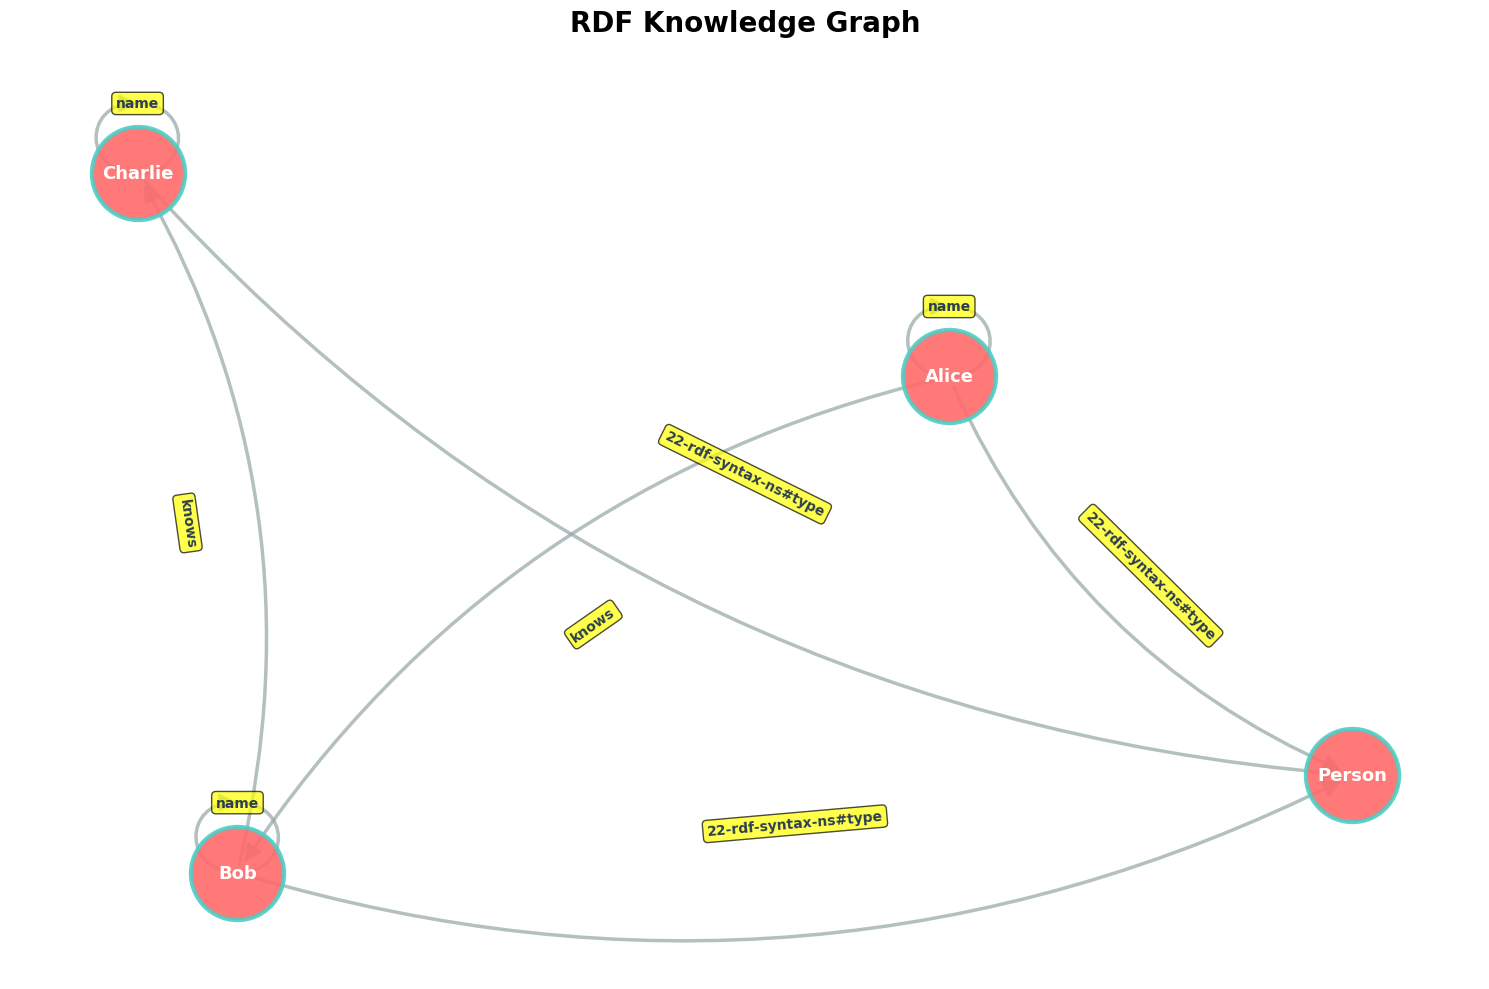

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=3, iterations=100, seed=42)
# Draw with custom styling
nx.draw_networkx_nodes(G, pos, node_color='#FF6B6B', node_size=4500, 
                        alpha=0.9, edgecolors='#4ECDC4', linewidths=3)
nx.draw_networkx_edges(G, pos, edge_color='#95A5A6', arrows=True, 
                        arrowsize=25, arrowstyle='-|>', width=2.5,
                        connectionstyle='arc3,rad=0.2', alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=13, font_weight='bold', 
                         font_color='white', font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10, 
                               font_color='#2C3E50', font_weight='bold',
                               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.title("RDF Knowledge Graph", fontsize=20, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

## 🧠 What is SPARQL?

SPARQL (SPARQL Protocol and RDF Query Language) is used to **query RDF graphs**.

A basic SPARQL query has three parts:
1. **PREFIX** — shorthand for namespaces
2. **SELECT** — what variables you want to return
3. **WHERE** — triple patterns to match in the graph

Let's query our RDF graph to get all people and their names.


## 🧠 What is SPARQL?

**SPARQL** (SPARQL Protocol and RDF Query Language) is the standard query language for **RDF graphs** — think of it as "SQL for knowledge graphs." Just like SQL queries databases, SPARQL queries semantic data stored in RDF format.

---

### 📋 Core Components of a SPARQL Query

Every SPARQL query typically contains three essential parts:

#### 1. **PREFIX** — Namespace Declarations
Defines shorthand notation for long URIs to make queries more readable.
```sparql
PREFIX ex: <http://example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
```
💡 **Think of it like:** Import statements in Python or `using` in C#

#### 2. **SELECT** — Result Variables
Specifies which variables you want to retrieve from the query.
```sparql
SELECT ?person ?name
```
💡 **Variables always start with `?`** and represent the values you want to extract

#### 3. **WHERE** — Triple Patterns (The Query Logic)
Defines patterns to match against the RDF graph using subject-predicate-object triples.
```sparql
WHERE {
    ?person rdf:type ex:Person .
    ?person ex:name ?name .
}
```
💡 **Each line is a triple pattern** — the query engine finds all triples that match these patterns

---


### 🔍 Complete Example: Query All People and Their Names

Let's query our RDF graph to retrieve all people and their names:
```sparql
PREFIX ex: <http://example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?person ?name
WHERE {
    ?person rdf:type ex:Person .
    ?person ex:name ?name .
}
```

**What this query does:**
1. Finds all subjects (`?person`) that have type `ex:Person`
2. For each person, retrieves their `ex:name` property
3. Returns both the person URI and their name

**Expected Results:**
| ?person | ?name |
|---------|-------|
| ex:Alice | "Alice" |
| ex:Bob | "Bob" |
| ex:Charlie | "Charlie" |

---

### 🎯 Key SPARQL Concepts to Remember

- **Triple Patterns**: Basic building blocks — match `?subject predicate ?object`
- **Variables**: Start with `?` (e.g., `?person`, `?name`) — placeholders for matched values
- **Joins**: Variables appearing in multiple patterns automatically join the results
- **Period (`.`)**: Separates triple patterns (like semicolon in SQL)
- **Case Sensitivity**: SPARQL keywords (SELECT, WHERE) are case-insensitive, but URIs are case-sensitive

---

## 🔍 Simple SELECT Query

In [8]:
q1 = """
PREFIX ex: <http://example.org/>

SELECT ?person ?name
WHERE {
  ?person a ex:Person ;
          ex:name ?name .
}
"""

for row in g.query(q1):
    print(row)
print("\n")
print("--------------------------------------------")
import pandas as pd

results = g.query(q1)
df = pd.DataFrame(results, columns=['person', 'name'])
print(df)



(rdflib.term.URIRef('http://example.org/Alice'), rdflib.term.Literal('Alice'))
(rdflib.term.URIRef('http://example.org/Bob'), rdflib.term.Literal('Bob'))
(rdflib.term.URIRef('http://example.org/Charlie'), rdflib.term.Literal('Charlie'))


--------------------------------------------
                       person     name
0    http://example.org/Alice    Alice
1      http://example.org/Bob      Bob
2  http://example.org/Charlie  Charlie


## 🔗 Querying Relationships
Let’s find who knows whom in our graph.


In [9]:
q2 = """
PREFIX ex: <http://example.org/>

SELECT ?p1 ?p2
WHERE {
  ?p1 ex:knows ?p2 .
}
"""

for row in g.query(q2):
    print(f"{row.p1.split('/')[-1]} knows {row.p2.split('/')[-1]}")


Alice knows Bob
Bob knows Charlie


**What it does:**
- **Query**: Selects all pairs where `?p1` knows `?p2` using the `ex:knows` predicate
- **`.split('/')[-1]`**: Extracts just the name from the full URI (e.g., `http://example.org/Alice` → `Alice`)
- **f-string**: Formats output in readable form: `"Alice knows Bob"`

**Output:**
```
Alice knows Bob
Bob knows Charlie
```

This demonstrates how to query and format relationship data from an RDF graph.

## 🔎 Using FILTER
We can filter results using conditions — for example, people whose name starts with “A”.


In [10]:
q3 = """
PREFIX ex: <http://example.org/>

SELECT ?person ?name
WHERE {
  ?person a ex:Person ;
          ex:name ?name .
  FILTER regex(?name, "^A", "i")
}
"""

for row in g.query(q3):
    print(row)


(rdflib.term.URIRef('http://example.org/Alice'), rdflib.term.Literal('Alice'))


### 🔎 Filtering SPARQL Query Results

This query demonstrates how to filter results using pattern matching:


**What it does:**
- **Query**: Selects all people and their names (like before)
- **`FILTER`**: Adds a condition to filter the results
- **`regex(?name, "^A", "i")`**: Uses regular expression matching
  - `?name` → the variable to test
  - `"^A"` → pattern that matches names starting with "A"
  - `"i"` → case-insensitive flag (matches "A" or "a")

**Output:**
```
(rdflib.term.URIRef('http://example.org/Alice'), rdflib.term.Literal('Alice'))
```

Only returns people whose names start with "A" (in this case, just Alice). This shows how SPARQL can filter results similar to SQL's `WHERE` clause with pattern matching.

## ⚙️ OPTIONAL and LIMIT
OPTIONAL allows retrieval of data that *may* exist (like left join in SQL),
while LIMIT restricts the number of results.


In [10]:
q4 = """
PREFIX ex: <http://example.org/>

SELECT ?person ?knows
WHERE {
  ?person a ex:Person .
  OPTIONAL { ?person ex:knows ?knows . }
}
LIMIT 3
"""

for row in g.query(q4):
    print(row)


(rdflib.term.URIRef('http://example.org/Alice'), rdflib.term.URIRef('http://example.org/Bob'))
(rdflib.term.URIRef('http://example.org/Bob'), rdflib.term.URIRef('http://example.org/Charlie'))
(rdflib.term.URIRef('http://example.org/Charlie'), None)


### 🔀 Optional Patterns and Limiting Results

This query demonstrates how to include optional data and limit the number of results:




**What it does:**
- **Required Pattern**: `?person a ex:Person` → Must match (finds all people)
- **`OPTIONAL`**: `?person ex:knows ?knows` → Tries to match, but doesn't exclude results if it fails
  - If a person knows someone, `?knows` is bound to that person
  - If a person doesn't know anyone, `?knows` is `None` (not excluded from results)
- **`LIMIT 3`**: Returns only the first 3 results

**Output:**
```
(rdflib.term.URIRef('http://example.org/Alice'), rdflib.term.URIRef('http://example.org/Bob'))
(rdflib.term.URIRef('http://example.org/Bob'), rdflib.term.URIRef('http://example.org/Charlie'))
(rdflib.term.URIRef('http://example.org/Charlie'), None)
```

Notice Charlie appears with `None` because Charlie doesn't know anyone—but is still included thanks to `OPTIONAL`. This is like SQL's `LEFT JOIN`.

## 🌍 Querying a Real Knowledge Graph — DBpedia

DBpedia is a public Knowledge Graph extracted from Wikipedia.
You can access it with SPARQL directly using its endpoint:  
🔗 https://dbpedia.org/sparql


In [11]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint = SPARQLWrapper("https://dbpedia.org/sparql")
endpoint.setReturnFormat(JSON)

query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT ?abstract
WHERE {
  dbr:Albert_Einstein dbo:abstract ?abstract .
  FILTER (lang(?abstract) = 'en')
}
"""

endpoint.setQuery(query)
results = endpoint.query().convert()

for r in results["results"]["bindings"]:
    print(r["abstract"]["value"])



Albert Einstein (/ˈaɪnstaɪn/ EYEN-styne; German: [ˈalbɛʁt ˈʔaɪnʃtaɪn]; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest and most influential physicists of all time. Einstein is best known for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics. Relativity and quantum mechanics are the two pillars of modern physics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been dubbed "the world's most famous equation". His work is also known for its influence on the philosophy of science. He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality resulted in "Einstein" becoming synonymous with "genius". In 1905, a y

### 🌍 Other Public SPARQL Endpoints to Explore

You can connect to these endpoints by changing the URL:

| Endpoint | URL | Description |
|----------|-----|-------------|
| **Wikidata** | `https://query.wikidata.org/sparql` | Structured data from Wikipedia |
| **DBpedia** | `https://dbpedia.org/sparql` | Wikipedia as linked data |
| **GeoNames** | `http://factforge.net/sparql` | Geographic database |
| **Bio2RDF** | `http://bio2rdf.org/sparql` | Biological and chemical data |
| **British National Bibliography** | `http://bnb.data.bl.uk/sparql` | Books and publications |

---

### 💡 Tips for Querying DBpedia

1. **Use `LIMIT`** to avoid overwhelming results
2. **Filter by language**: `FILTER (lang(?label) = 'en')`
3. **Explore first**: Use `SELECT ?property ?value WHERE { dbr:YourTopic ?property ?value }` to discover available properties
4. **Common prefixes**:
   - `dbo:` → DBpedia Ontology (classes and properties)
   - `dbr:` → DBpedia Resources (specific entities)
   - `rdfs:label` → Human-readable names
   - `foaf:name` → Names of peopleRetryClaude does not have the ability to run the code it generates yet.Claude can make mistakes. Please double-check responses.

In [12]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Connect to Wikidata endpoint
endpoint = SPARQLWrapper("https://query.wikidata.org/sparql")
endpoint.setReturnFormat(JSON)
endpoint.addCustomHttpHeader("User-Agent", "MyApp/1.0 (educational purpose)")

In [14]:
query = """
SELECT ?person ?personLabel ?year
WHERE {
  ?person wdt:P166 wd:Q38104 .  # P166 = award received, Q38104 = Nobel Prize in Physics
  ?person wdt:P166 ?award .
  ?award wdt:P585 ?year .       # P585 = point in time
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
ORDER BY DESC(?year)
LIMIT 20
"""

endpoint.setQuery(query)
results = endpoint.query().convert()

for r in results["results"]["bindings"]:
    person = r["personLabel"]["value"]
    year = r["year"]["value"][:4]  # Extract just the year
    print(f"{year}: {person}")

2014: Zhores Alferov
1991: Charles K. Kao


In [15]:
query = """
SELECT ?country ?countryLabel ?capital ?capitalLabel ?population
WHERE {
  ?country wdt:P31 wd:Q6256 .        # P31 = instance of, Q6256 = country
  ?country wdt:P36 ?capital .        # P36 = capital
  ?country wdt:P1082 ?population .   # P1082 = population
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
ORDER BY DESC(?population)
LIMIT 20
"""

endpoint.setQuery(query)
results = endpoint.query().convert()

for r in results["results"]["bindings"]:
    country = r["countryLabel"]["value"]
    capital = r["capitalLabel"]["value"]
    population = int(r["population"]["value"])
    print(f"{country}: {capital} (Population: {population:,})")

People's Republic of China: Beijing (Population: 1,442,965,000)
India: New Delhi (Population: 1,326,093,247)
United States: Washington, D.C. (Population: 340,110,988)
Indonesia: Jakarta (Population: 275,439,000)
Pakistan: Islamabad (Population: 223,773,700)
Brazil: Brasília (Population: 213,421,037)
Nigeria: Abuja (Population: 211,400,708)
Brazil: Brasília (Population: 203,062,512)
Bangladesh: Dhaka (Population: 171,466,990)
Russia: Moscow (Population: 146,119,928)
Ethiopia: Addis Ababa (Population: 128,691,692)
Mexico: Mexico City (Population: 124,777,324)
Japan: Tokyo (Population: 123,802,000)
Egypt: Cairo (Population: 114,535,772)
Philippines: Manila (Population: 112,729,484)
Democratic Republic of the Congo: Kinshasa (Population: 105,789,731)
Vietnam: Hanoi (Population: 96,208,984)
Iran: Tehran (Population: 92,417,700)
Turkey: Ankara (Population: 85,372,377)
Germany: Berlin (Population: 83,577,140)


## ✅ Summary

You learned:
- RDF = graph of triples (subject, predicate, object)
- How to build RDF graphs with `rdflib`
- Querying graphs using SPARQL (`SELECT`, `FILTER`, `OPTIONAL`)
- Querying real Knowledge Graphs via DBpedia endpoint
- Visualizing graph structure

🚀 Next steps:
- Learn SPARQL `CONSTRUCT`, `ASK`, `DESCRIBE`
- Explore tools like GraphDB or Blazegraph for managing your own Knowledge Graphs.
